In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [2]:
def f(x): #Creamos la funcion
    return x**2 - 4

In [3]:
def Regula_falsi(f, a, b, e= 1e-9, N = 1000000): #Definimos las variables que necesitamos
    if f(a)*f(b) > 0: #Miramos di el intervalo es valido
        raise ValueError('El intervalo no contiene la raiz') #Si no retornamos error en el valor
    else:
        for i in range(N): #Inicializamos el ciclo
           c = (a * f(b) - b * f(a)) / (f(b)-f(a)) #Calculamos c
           if abs(f(c)) < e: #Miramos si el valor evaluado es menor que la tolerancia
               return c
           elif f(c)*f(a)>0: #Si no actualizamos los valores dependiendo del intervalo
               a = c
           else :
               b = c
        raise RuntimeError('Maximo de iteraciones alcanzado')
               

In [4]:
Regula_falsi(f,1,3)

1.9999999997815467

In [5]:
Regula_falsi(f,-3,-1)

-1.9999999997815467

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [6]:
def Fuerza_electrica(a,x):
    Eo = 8.8541878128e-12 #Definimos la función de Fuerza electrica
    q = 2e-5
    return (1/(4*np.pi* Eo))* (q**2 * x)/((x**2+a**2)**(3/2))

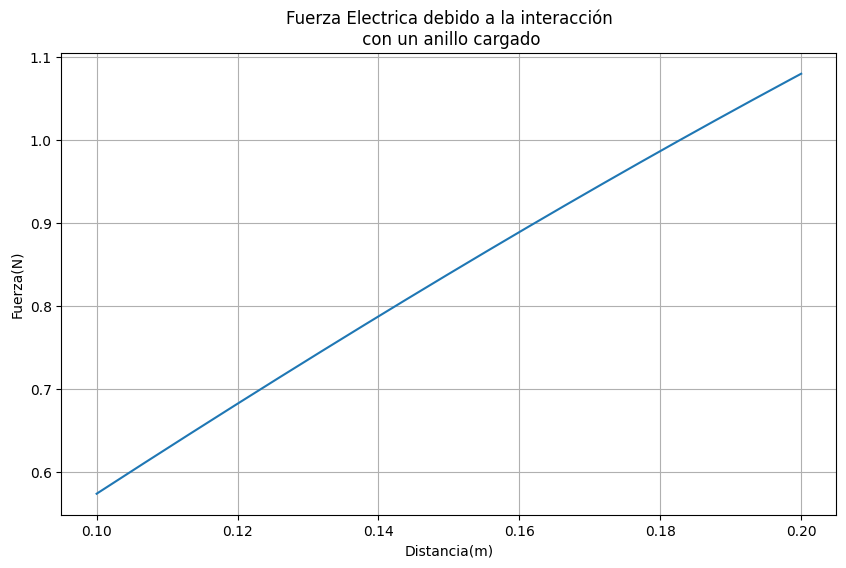

In [7]:
#Creamos el array donde guardaremos las distancias
x = np.linspace(0.1,0.2,1000)
#Mostramos la figura
plt.figure(figsize = (10,6))
plt.title('Fuerza Electrica debido a la interacción\n con un anillo cargado')
plt.plot(x,Fuerza_electrica(0.85,x))
plt.xlabel('Distancia(m)')
plt.ylabel('Fuerza(N)')
plt.grid()
plt.show()

In [8]:
def f(x, a= 0.85): #Definimos la funcion con a establecido
    Eo = 8.8541878128e-12
    q = 2e-5
    return (1/(4*np.pi* Eo))* (q**2 * x)/((x**2 + a**2)**1.5) - 1.25 #Igualamos a cero para el valor que queremos encontrar

In [9]:
df = lambda x, h=1e-14: ((f(x) + h) - f(x-h)) /(2*h) # Diferencias finitas

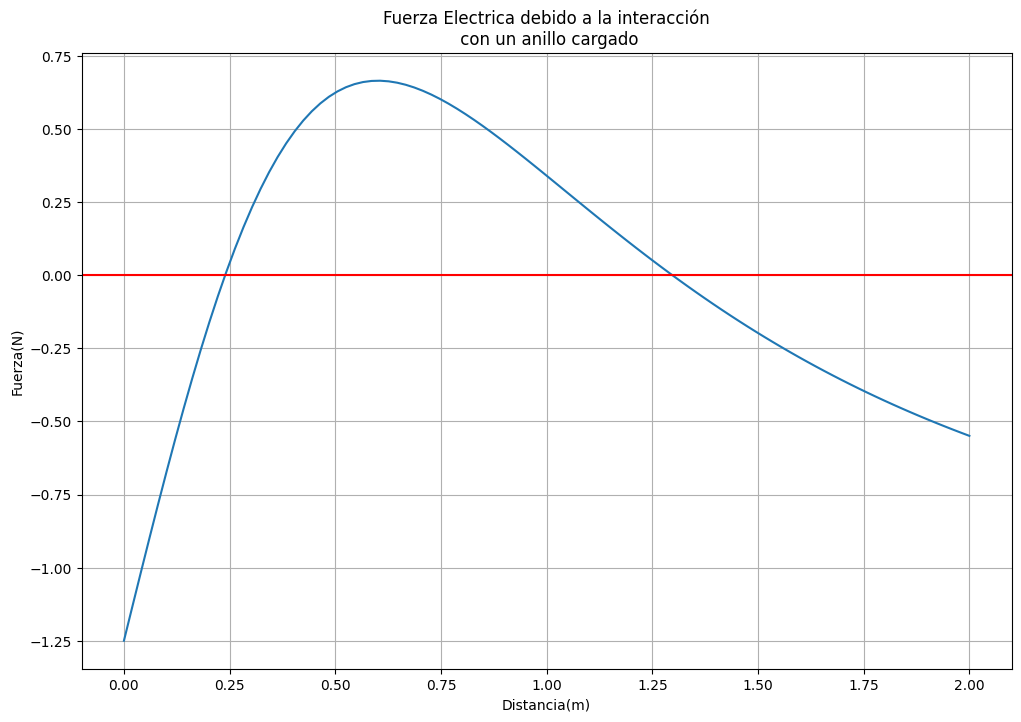

In [10]:
# Miramos en que valor mas o menos se corta la grafica
x = np.linspace(0,2,100)
plt.figure(figsize = (12,8))
plt.title('Fuerza Electrica debido a la interacción\n con un anillo cargado')
plt.plot(x,f(x))
plt.xlabel('Distancia(m)')
plt.ylabel('Fuerza(N)')
plt.axhline(y=0,color = 'red')
plt.grid()
plt.show()

In [11]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):

    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        # Asegurarse de que df(x0) no sea cero
        if df_x0 == 0:
            raise ValueError("La derivada es cero, el método no puede continuar.")

        # Fórmula de Newton-Raphson
        x1 = x0 - f_x0 / df_x0
        # Verificar la condición de convergencia
        if abs(x1 - x0) < tol:
            return x1
            
        # Actualizar el valor para la siguiente iteración
        x0 = x1

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [12]:
newton_raphson(f,df,1.25,1e-3,1000) #Se observa que como la funcion en las raices es casi lineal el metodo no converge facilmente

RuntimeError: El método no convergió en el número máximo de iteraciones.

In [13]:
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)

        # Asegurarse de que f(x1) - f(x0) no sea cero
        if f_x1 - f_x0 == 0:
            raise ValueError("f(x1) - f(x0) es cero, el método no puede continuar.")

        # Fórmula de la secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Verificar la condición de convergencia
        if abs(x2 - x1) < tol:
            return x2# Retorna la raíz encontrada

        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [14]:
metodo_secante(f,1,1.5)

1.297373942488821

In [15]:
def biseccion(a,b,f,tol= 1e-14,max_iter = 1000000): #Usamos el metodo de la bisección
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")  # Lanza una excepción si no se cumple la condición
    else:
        for i in range(max_iter):  # Itera hasta el número máximo de iteraciones
            c = (a + b) / 2  # Calcula el punto medio inicial

            # Si el valor absoluto de f(c) es menor que la tolerancia, se considera que se encontró la raíz
            if abs(f(c)) < tol:
                return c  # Retorna la raíz encontrada
            # Si f(c) y f(a) tienen signos opuestos, se ajusta el intervalo al lado izquierdo
            elif f(c) * f(a) < 0:
                b = c  # Se mueve el extremo derecho al punto medio

            else:
                a = c  # Se mueve el extremo izquierdo al punto medio
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [16]:
biseccion(1.25,1.5,f) #Encontramos la distancia

1.2973739424888464

In [17]:
radios = np.linspace(0.1,1,10) #Hacemos un array para los radios
distancias = [] #Creamos una lista donde almacenaremos las distancias
for radio in radios:
    t = lambda x : f(x,radio)#Actualizamos la funcion de fuerza al valor del radio
    distancias.append(metodo_secante(t,1,1.2)) # Con el metodo de la secante guardamos el valor

In [18]:
print(distancias)

[1.6914501097723333, 1.678035754187488, 1.6552685455067433, 1.6224690583487138, 1.5785316681374646, 1.521690631479758, 1.4490244320942178, 1.3552500512927481, 1.2289627891611552, 1.0323621557126375]


Se observa que a medida que aumentamos la distancia la fuerza elecrica disminuye

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [19]:
def v(t):
    g = 9.81 #m/s**2
    m0 = 1.6e5 #kg
    u = 1800 #m/s
    q = 2600 # kg/s
    return u * np.log(m0/(m0-q*t)) - g*t

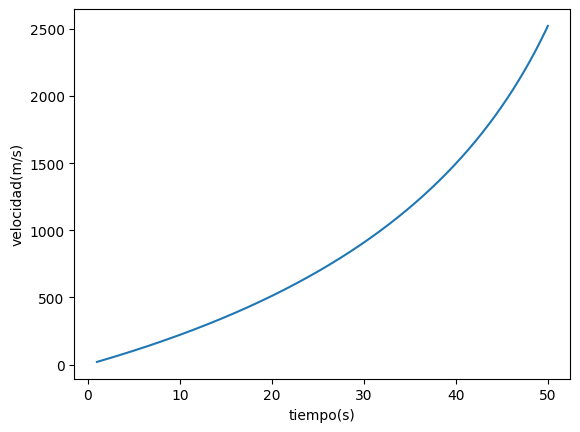

In [20]:
t = np.linspace(1,50,100000)
plt.plot(t,v(t))
plt.xlabel('tiempo(s)')
plt.ylabel('velocidad(m/s)')
plt.show()

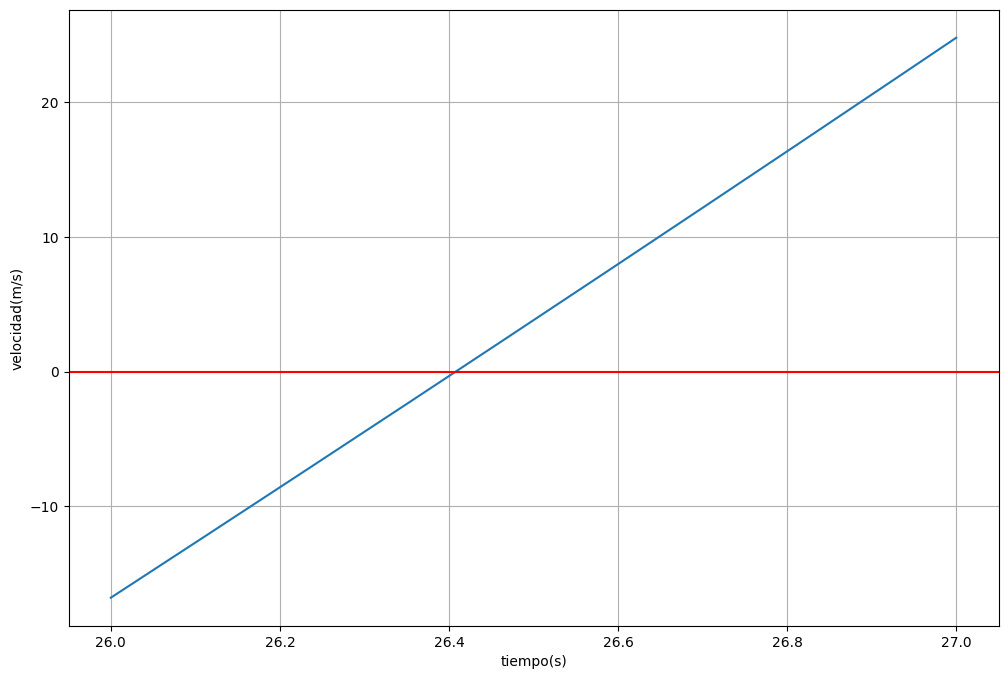

In [21]:
t = np.linspace(26,27,10000)
plt.figure(figsize = (12,8))
plt.plot(t,v(t)-750)
plt.xlabel('tiempo(s)')
plt.ylabel('velocidad(m/s)')
plt.axhline(y = 0, color = 'red')
plt.grid()
plt.show()

In [22]:
def v_1(t): # Definimos de nuevo la funcion pero de tal manera que podamos igualarla a cero para encontrar el valor de 750
    g = 9.81 #m/s**2
    m0 = 1.6e5 #kg
    u = 1800 #m/s
    q = 2600 # kg/s
    return u * np.log(m0/(m0-q*t)) - g*t - 750

In [23]:
def dv(t):
    g = 9.81 #m/s**2
    m0 = 1.6e5 #kg
    u = 1800 #m/s
    q = 2600 # kg/s #Definimos la Derivada
    return u*(1- q*t/m0)-g

In [24]:
def Newton_Rapson_v(t0, df=dv, e=1e-14, N=100000000, f=v_1): #Aplicamos el metodo de Newton rapson con la funcion igualada a cero
    for _ in range(N):
        
        f_t0 = f(t0)
        df_t0 = df(t0)

        if df_t0 == 0:
            raise ValueError("La derivada es cero, el método no puede continuar.")

        t1 = t0 - f_t0 / df_t0  

        if abs(t1 - t0) < e:
            return t1

        t0 = t1

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

In [25]:
Newton_Rapson_v(26.4) #Reportamos el valor de tiempo cuando v es 750

26.407847955966833

In [26]:
Regula_falsi(v_1,26.4,26.6) #Aplicamos el metodo de Regula falsi

26.40784795596601

In [27]:
biseccion(26.4,26.6,v_1,1e-6)

26.407847976684565

In [28]:
def v_2(t,u): #Definimos la función para que ahora dependa de u
    g = 9.81 #m/s**2
    m0 = 1.6e5 #kg
    q = 2600 # kg/s
    return u * np.log(m0/(m0-q*t)) - g*t - 750

In [29]:
array_u = np.linspace(1800,3800,21)

In [30]:
valores_de_t = [] #Hacemos un array con los valores de t
for u in array_u:
    # Definir una función f(t) con u fijo
    f_t = lambda t: v_2(t, u)
    #Aplicamos el metodo de Newton Raphson
    valores_de_t.append(Newton_Rapson_v(26.4, f = f_t))

In [31]:
valores_de_t

[26.407847955966833,
 25.113218886562294,
 23.92738726079292,
 22.83885498778472,
 21.837380648533493,
 20.913888403566663,
 20.06035827633494,
 19.26971256265866,
 18.535706448989416,
 17.85282689438006,
 17.216201453888143,
 16.62151736314505,
 16.0649504667214,
 15.543103207985713,
 15.052950751448794,
 14.59179428572614,
 14.157220599025917,
 13.747067095326765,
 13.359391508207278,
 12.99244565937365,
 12.644652694304133]

Se puede decir que a medidad que la velocidad en que se expulsa el conbustible aumenta, el tiemopo en alcanzar 
la velocidad de 750 m/s es menor